In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# Definir los universos de discurso
# Antecedentes
cantidad_reparaciones = ctrl.Antecedent(np.arange(2, 22, 2), 'cantidad_reparaciones')
monto_reparaciones = ctrl.Antecedent(np.arange(750, 38700, 3450), 'monto_reparaciones')
calificacion_promedio = ctrl.Antecedent(np.arange(15, 92, 7), 'calificacion_promedio')

# Consecuencias
prima_seguro = ctrl.Consequent(np.arange(1700, 6650, 450), 'prima_seguro')

# Definir las funciones de pertenencia para la canidad de reparaciones 
cantidad_reparaciones['baja'] = fuzz.trimf(cantidad_reparaciones.universe, [2, 2, 10])
cantidad_reparaciones['media'] = fuzz.trimf(cantidad_reparaciones.universe, [5, 10, 15])
cantidad_reparaciones['alta'] = fuzz.trimf(cantidad_reparaciones.universe, [10, 20, 20])

# Definir las funciones de pertenencia para el monto de reparaciones
monto_reparaciones['baja'] = fuzz.trimf(monto_reparaciones.universe, [750, 750, 17250])
monto_reparaciones['media'] = fuzz.trimf(monto_reparaciones.universe, [6900, 17250, 27600])
monto_reparaciones['alta'] = fuzz.trimf(monto_reparaciones.universe, [17250, 35250, 35250])

# Definir las funciones de pertenencia para la calificación promedio
calificacion_promedio['baja'] = fuzz.trimf(calificacion_promedio.universe, [15, 15, 50])
calificacion_promedio['media'] = fuzz.trimf(calificacion_promedio.universe, [15, 50, 85])
calificacion_promedio['alta'] = fuzz.trimf(calificacion_promedio.universe, [50, 85, 85])


# Definir las funciones de pertenencia para la prima del seguro
prima_seguro['baja'] = fuzz.trimf(prima_seguro.universe, [1700, 1700, 3950])
prima_seguro['media'] = fuzz.trimf(prima_seguro.universe, [1700, 3950, 6200])
prima_seguro['alta'] = fuzz.trimf(prima_seguro.universe, [3950, 6200, 6200])


In [3]:
# Definir las reglas difusas

# Absolutas
regla1 = ctrl.Rule(cantidad_reparaciones['baja'] & monto_reparaciones['baja'] & calificacion_promedio['baja'], prima_seguro['baja'])
regla2 = ctrl.Rule(cantidad_reparaciones['media'] & monto_reparaciones['media'] & calificacion_promedio['media'], prima_seguro['media'])
regla3 = ctrl.Rule(cantidad_reparaciones['alta'] & monto_reparaciones['alta'] & calificacion_promedio['alta'], prima_seguro['alta'])

# Media
regla4 = ctrl.Rule(cantidad_reparaciones['baja'] | monto_reparaciones['baja'] & calificacion_promedio['media'], prima_seguro['media'])
regla5 = ctrl.Rule(cantidad_reparaciones['media'] & monto_reparaciones['baja'] | calificacion_promedio['baja'], prima_seguro['media'])
regla6 = ctrl.Rule(monto_reparaciones['media'] & cantidad_reparaciones['baja'] | calificacion_promedio['baja'], prima_seguro['media'])

# Alta
regla7 = ctrl.Rule(cantidad_reparaciones['alta'] & monto_reparaciones['media'] | calificacion_promedio['media'], prima_seguro['alta'])
regla8 = ctrl.Rule(cantidad_reparaciones['media'] | monto_reparaciones['media'] & calificacion_promedio['alta'], prima_seguro['alta'])
regla9 = ctrl.Rule(monto_reparaciones['alta'] & cantidad_reparaciones['media'] | calificacion_promedio['media'], prima_seguro['alta'])



In [4]:
# Crear el sistema de control
control_prima = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, regla6, regla7, regla8, regla9])
simulador = ctrl.ControlSystemSimulation(control_prima)

# Asignar valores de entrada
simulador.input['cantidad_reparaciones'] = 9  # Ejemplo de cantidad reparaciones
simulador.input['monto_reparaciones'] = 3400      # Ejemplo de monto reparaciones
simulador.input['calificacion_promedio'] = 65      # Ejemplo de calificación promedio

# Ejecutar la simulación
simulador.compute()

# Obtener el resultado
print(f"Valor prima seguro: {simulador.output['prima_seguro']*1000:.2f}")


Valor prima seguro: 4315000.00


c:\Users\usuario\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


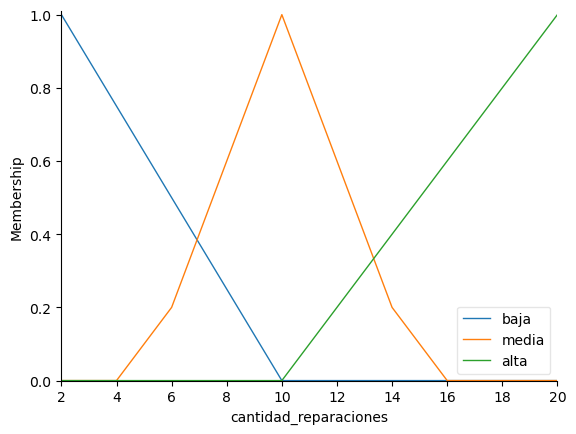

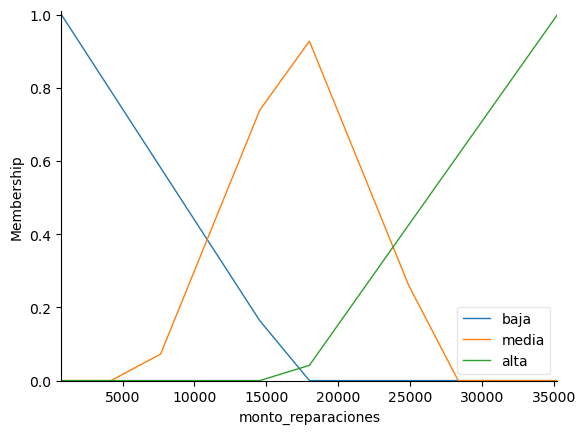

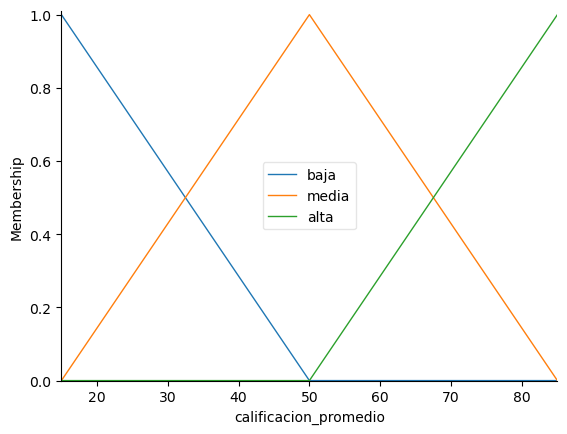

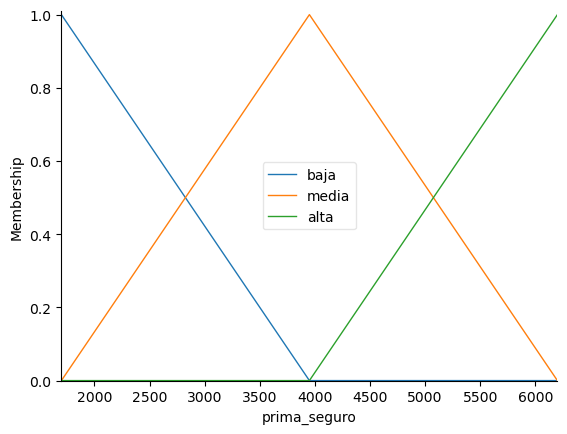

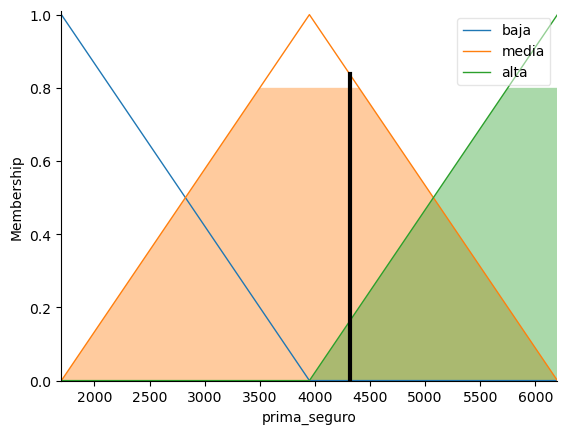

In [5]:
# Visualizar funciones de pertenencia
cantidad_reparaciones.view()
monto_reparaciones.view()
calificacion_promedio.view()

prima_seguro.view()

# Visualizar resultado
prima_seguro.view(sim=simulador)
